In [2]:
import pandas as pd
df = pd.read_csv('Course_page_actions.csv')
df.head(10)

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
5,2016-09-24 22:18:15.857434,266695,experiment,view,151.235475
6,2016-09-24 22:42:41.218757,701620,control,view,302.951552
7,2016-09-24 22:43:35.119748,701620,control,enroll,NaN
8,2016-09-25 01:21:10.649300,321250,experiment,view,98.678583
9,2016-09-25 01:23:19.800167,439910,control,view,61.234458


In [6]:
obs_diff=df[df.group=="experiment"].duration.mean()-df[df.group=="control"].duration.mean()
obs_diff

15.537053609623726

(array([   9.,  111.,  573., 1828., 2961., 2623., 1434.,  397.,   54.,
          10.]),
 array([ 6.86816067,  8.65419673, 10.44023279, 12.22626885, 14.01230491,
        15.79834098, 17.58437704, 19.3704131 , 21.15644916, 22.94248522,
        24.72852129]),
 <a list of 10 Patch objects>)

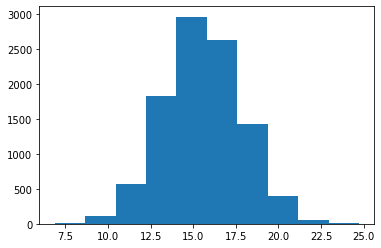

In [7]:
import matplotlib.pyplot as plt
diff=[]
for _ in range(10000):
    sample = df.sample(df.shape[0],replace=True)
    diff.append(sample[sample.group=='experiment'].duration.mean()-sample[sample.group=='control'].duration.mean())
plt.hist(diff)

(array([  24.,  208.,  859., 1945., 2784., 2435., 1240.,  416.,   78.,
          11.]),
 array([-7.70561797, -6.07272648, -4.439835  , -2.80694351, -1.17405202,
         0.45883947,  2.09173095,  3.72462244,  5.35751393,  6.99040542,
         8.6232969 ]),
 <a list of 10 Patch objects>)

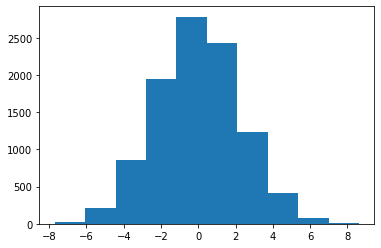

In [8]:
import numpy as np
diff = np.array(diff)
null = np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

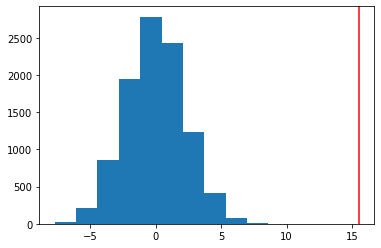

In [9]:
plt.hist(null)
plt.axvline(x=obs_diff, c='red')

In [10]:
(null>obs_diff).mean()

0.0